In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [34]:
# Wczytanie danych z plików
particle_velocity_data = np.loadtxt('build/data/particle_velocity.txt', delimiter=',')
velocity_data = np.loadtxt('build/data/velocity.txt', delimiter=',')
temperature_data = np.loadtxt('build/data/temperature.txt', delimiter=',')

In [39]:
times = particle_velocity_data[:, 0]
time_steps = times.shape[0]

vx = particle_velocity_data[:, 1]
vy = particle_velocity_data[:, 2]
velocity = np.sqrt(vx**2 + vy**2)

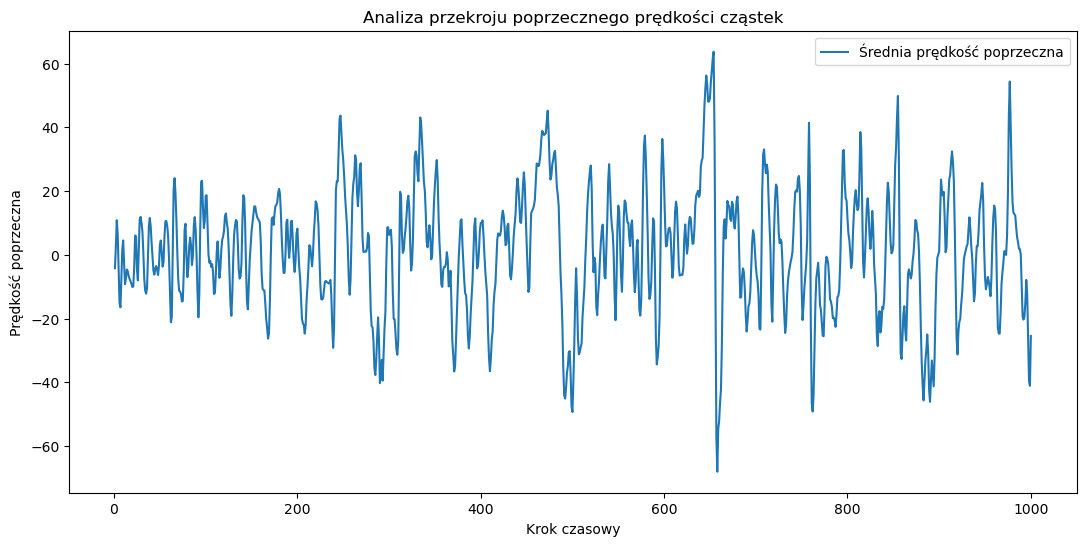

In [45]:
# Inicjalizuj tablicę na prędkości poprzeczne
transverse_velocities = []

# Oblicz średnie prędkości poprzeczne
for i in range(1, time_steps + 1):
    velocities_at_step = particle_velocity_data[particle_velocity_data[:, 0] == i, 2] #predkosc vy
    transverse_velocities.append(np.mean(velocities_at_step))

# Wykres prędkości poprzecznej
plt.figure(figsize=(13, 6))
plt.plot(np.arange(1, time_steps + 1), transverse_velocities, label='Średnia prędkość poprzeczna')
plt.title('Analiza przekroju poprzecznego prędkości cząstek')
plt.xlabel('Krok czasowy')
plt.ylabel('Prędkość poprzeczna')
plt.legend()
plt.show()

window_length: Określa szerokość okna, które jest używane do uśredniania danych. Wartość tego parametru wpływa na to, jak wiele punktów jest brane pod uwagę podczas procesu uśredniania. Im większa wartość window_length, tym szersze okno, co może prowadzić do bardziej agresywnego uśredniania. Zbyt duże window_length może jednak spowodować utratę istotnych szczegółów w danych.

polyorder: Określa stopień wielomianu używanego w procesie dopasowywania krzywej do punktów danych wewnątrz okna. Wartość ta wpływa na to, jak dobrze dopasowuje się krzywą do danych. Wyższe wartości polyorder pozwalają na dopasowanie bardziej skomplikowanych krzywych, ale mogą prowadzić do nadmiernego dopasowania, zwłaszcza gdy dane są obarczone szumem.

W praktyce eksperymentalnie dobiera się te parametry, testując różne wartości i obserwując, jakie efekty uzyskuje się na wynikowej krzywej. Ważne jest, aby znaleźć równowagę między wygładzaniem danych a utrzymaniem istotnych szczegółów. Eksperymentowanie z różnymi wartościami window_length i polyorder pozwoli znaleźć optymalne ustawienia dla konkretnego zestawu danych.

Krzywa "Wygładzona prędkość całkowita": Linia przerywana (czerwona) przedstawia wynik wygładzenia krzywej prędkości całkowitej za pomocą filtra Savitzky-Golay. Wygładzanie to pomaga zobaczyć ogólne trendy, eliminując szumy związane z pojedynczymi pomiarami.

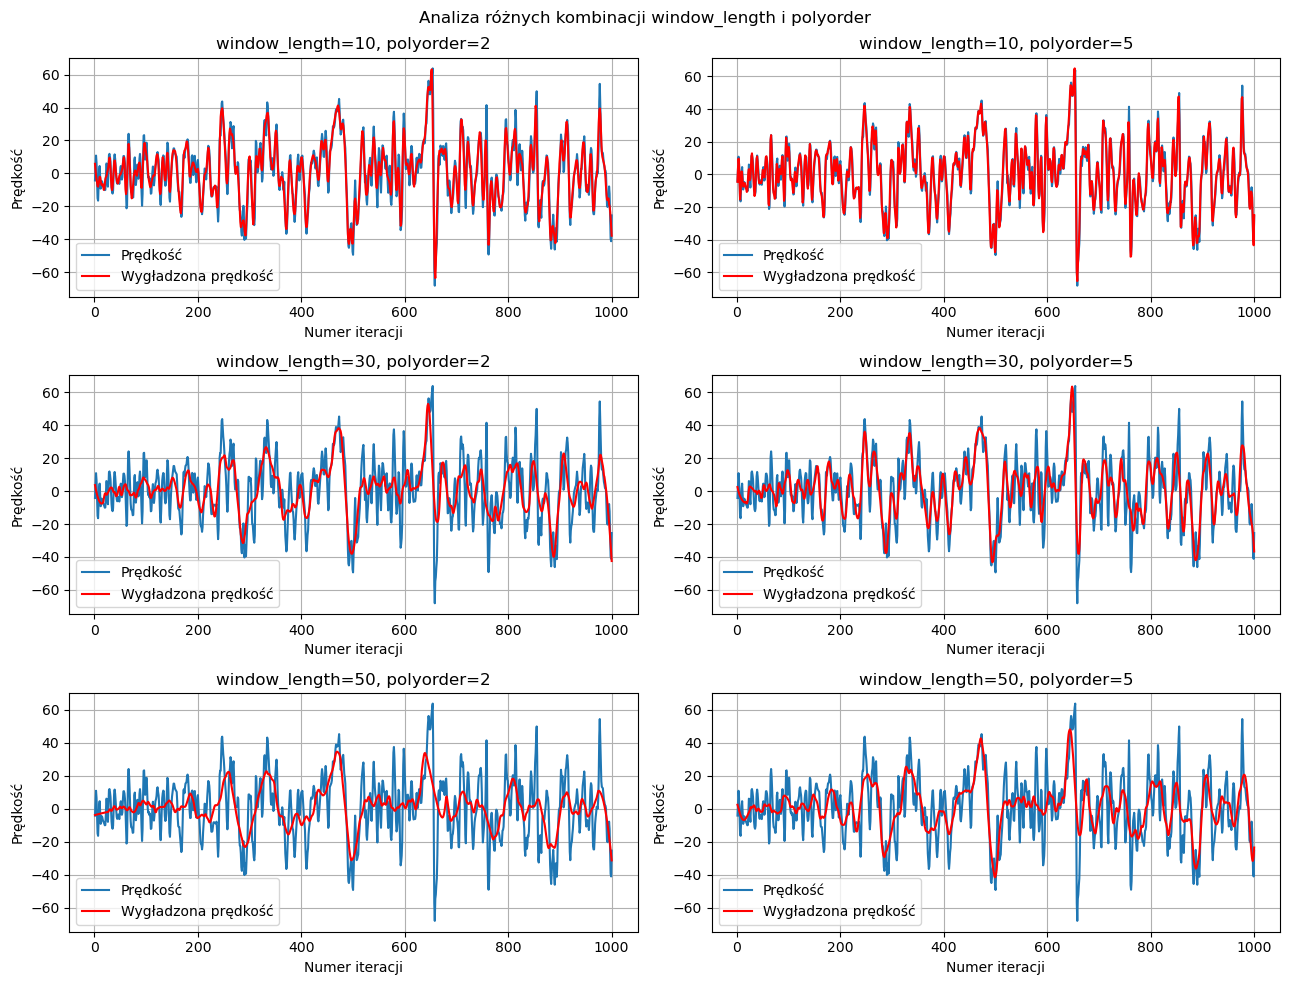

In [44]:
# Parametry do eksperymentów
window_lengths = [10, 30, 50]
polyorders = [2, 5]

# Tworzenie subplotów
fig, axs = plt.subplots(3, 2, figsize=(13, 10))

# Iteracja po różnych kombinacjach window_length i polyorder
for i, window_length in enumerate(window_lengths):
    for j, polyorder in enumerate(polyorders):
        # Użyj funkcji savgol_filter z odpowiednimi parametrami
        smoothed_velocity = savgol_filter(vy, window_length=window_length, polyorder=polyorder)
        
        # Wykres na odpowiednim subplotcie
        ax = axs[i, j]
        ax.plot(times, vy, label='Prędkość')
        ax.plot(times, smoothed_velocity, label='Wygładzona prędkość', linestyle='-', color='red')
        ax.set_title(f'window_length={window_length}, polyorder={polyorder}')
        ax.set_xlabel('Numer iteracji')
        ax.set_ylabel('Prędkość')
        ax.legend()
        ax.grid(True)

fig.suptitle('Analiza różnych kombinacji window_length i polyorder')
# Dostosowanie układu subplotów
plt.tight_layout()
plt.show()